<a href="https://colab.research.google.com/github/LeeSeungYun1020/Machine_Learning/blob/main/PyTorch_Tutorial/02_dataset_and_dataloader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터셋과 데이터로더

가독성과 모듈성 위해 데이터셋 코드와 모델 학습 코드 분리
데이터셋은 샘플과 라벨을 저장, 데이터로더는 데이터셋에 쉽게 접근할 수 있도록 반복 가능한 객체로 감싼다.

## 데이터셋 불러오기

In [2]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [3]:
train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw




Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw




Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw




Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


## 데이터셋 반복 및 시각화

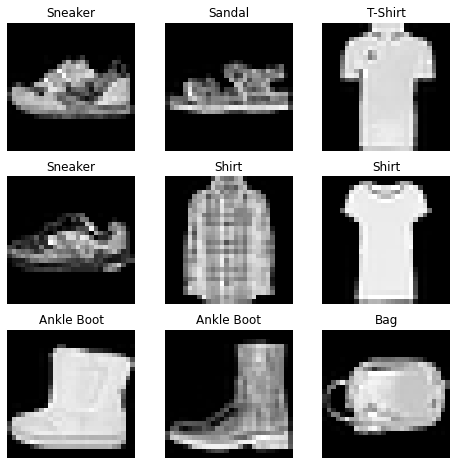

In [10]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot"
}

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
  sample_i = torch.randint(len(train_data), size=(1,)).item()
  img, label = train_data[sample_i]
  figure.add_subplot(rows, cols, i)
  plt.title(labels_map[label])
  plt.axis("off")
  plt.imshow(img.squeeze(), cmap="gray")
plt.show()

## 파일에서 사용자 정의 데이터셋 만들기

In [12]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
  def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
    self.img_label = pd.read_csv(annotations_file)
    self.img_dir = img_dir
    self.transform = transform
    self.target_transform = target_transform

  def __len__(self):
    return len(self.img_labels)

  def __getitem__ (self, idx):
    img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
    image = read_image(img_path)
    label = self.img_labels.iloc[idx, 1]
    if self.transform:
      image = self.transform(image)
    if self.target_transform:
      label = self.target_transform(label)
    return image, label

### \_\_init\_\_
파일 디렉토리와 트랜스폼 초기화
FashionMNIST 예시에서 labels.csv는 이미지 이름, 라벨 코드(tshirt1.jpg, 0)로 구성
### \_\_len\_\_
데이터셋 샘플 갯수
### \_\_getitem\_\_
인덱스 기반으로 샘플 가져와 반환
1. 디스크에서 이미지 식별
2. 이미지를 텐서로 변환
3. csv 데이터에서 라벨 획득
4. 변형 함수 호출
5. 텐서 이미지와 라벨은 dict형으로 반환

## 데이터로더로 학습 데이터 준비

In [15]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

Feature batch shape:  torch.Size([64, 1, 28, 28])
Labels batch shape:  torch.Size([64])


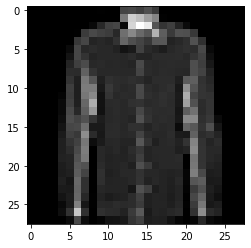

Label:  tensor(6)


In [17]:
train_features, train_labels = next(iter(train_dataloader))
print("Feature batch shape: ",train_features.size())
print("Labels batch shape: ", train_labels.size())
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print("Label: ", label)